In [1]:
#Importación de librerías 
import pandas as pd

In [2]:
# Leemos todas las hojas
data_inegi= pd.read_excel("contruccion.xlsx")

In [3]:
data_inegi.head(10)

,Instituto Nacional de Estadística y Geografía (INEGI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Construcción.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Series desestacionalizadas del valor total de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(Variación porcentual mensual),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Periodo,NaN,Total,Edificación,"Agua, riego y saneamiento",Electricidad y comunicaciones,Transporte,Petróleo y petroquímica,Otras construcciones
6,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Enero,NaN,-4.2,-0.3,5.5,-0.9,-5.8,-3.4,-3.2
8,Febrero,NaN,0.4,0.1,-5.1,-5.1,1.9,-3.5,3.7
9,Marzo,NaN,0.4,-0.4,4,-1.3,1.9,10.3,-0.9


In [4]:
data = data_inegi.copy()

In [5]:
data.drop(data.columns[1], axis=1, inplace = True)
data.columns = data.iloc[5]
data = data[6:]

In [6]:
data.head()

5,Periodo,Total,Edificación,"Agua, riego y saneamiento",Electricidad y comunicaciones,Transporte,Petróleo y petroquímica,Otras construcciones
6,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Enero,-4.2,-0.3,5.5,-0.9,-5.8,-3.4,-3.2
8,Febrero,0.4,0.1,-5.1,-5.1,1.9,-3.5,3.7
9,Marzo,0.4,-0.4,4,-1.3,1.9,10.3,-0.9
10,Abril,0,4.9,-9.9,-2.6,0.5,-4.5,0.3


In [7]:
filas = [] 

for i in range(0, len(data), 13):
    bloque = data.iloc[i:i+13].copy()     
    anio = bloque.iloc[0]['Periodo']  
    bloque = bloque.iloc[1:]         
    bloque['Año'] = anio            
    filas.append(bloque)           

df_procesado = pd.concat(filas, ignore_index=True)

In [8]:
df_procesado = df_procesado[:157]

In [9]:
df_procesado.to_csv("construccion_inegi.csv")

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def make_plots_cuantitativas(dataframe):
    df = dataframe.copy()

    # Seleccionar  variables cuantitativas
    quant_vars = ["Total",	"Edificación",	"Agua, riego y saneamiento",	"Electricidad y comunicaciones",	"Transporte",	"Petróleo y petroquímica"	,"Otras construcciones"]

    # ===== 1. Boxplots (cuartiles y outliers) =====
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(quant_vars):
        plt.subplot(1, len(quant_vars), i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

    # ===== 2. Histogramas (distribución, simetría/asimetría) =====
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(quant_vars):
        plt.subplot(2, 4, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histograma: {col}')
    plt.tight_layout()
    plt.show()

    # ===== 3. Análisis de correlación - Heatmap =====
    plt.figure(figsize=(8, 6))
    corr = df[quant_vars].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Mapa de calor de correlaciones')
    plt.show()

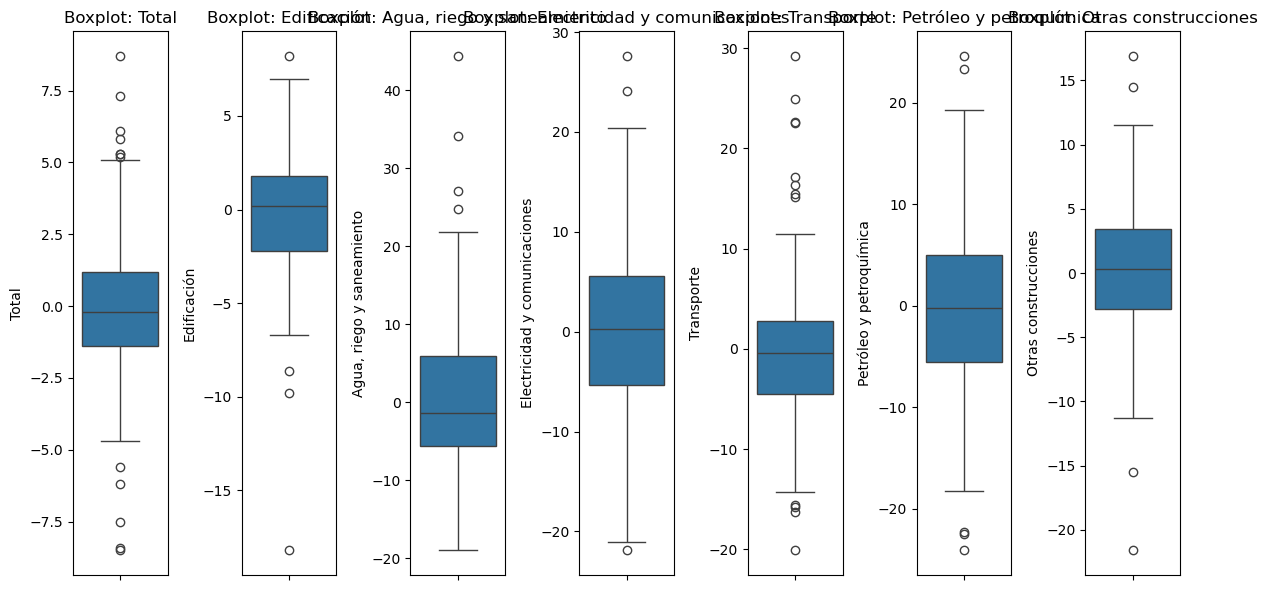

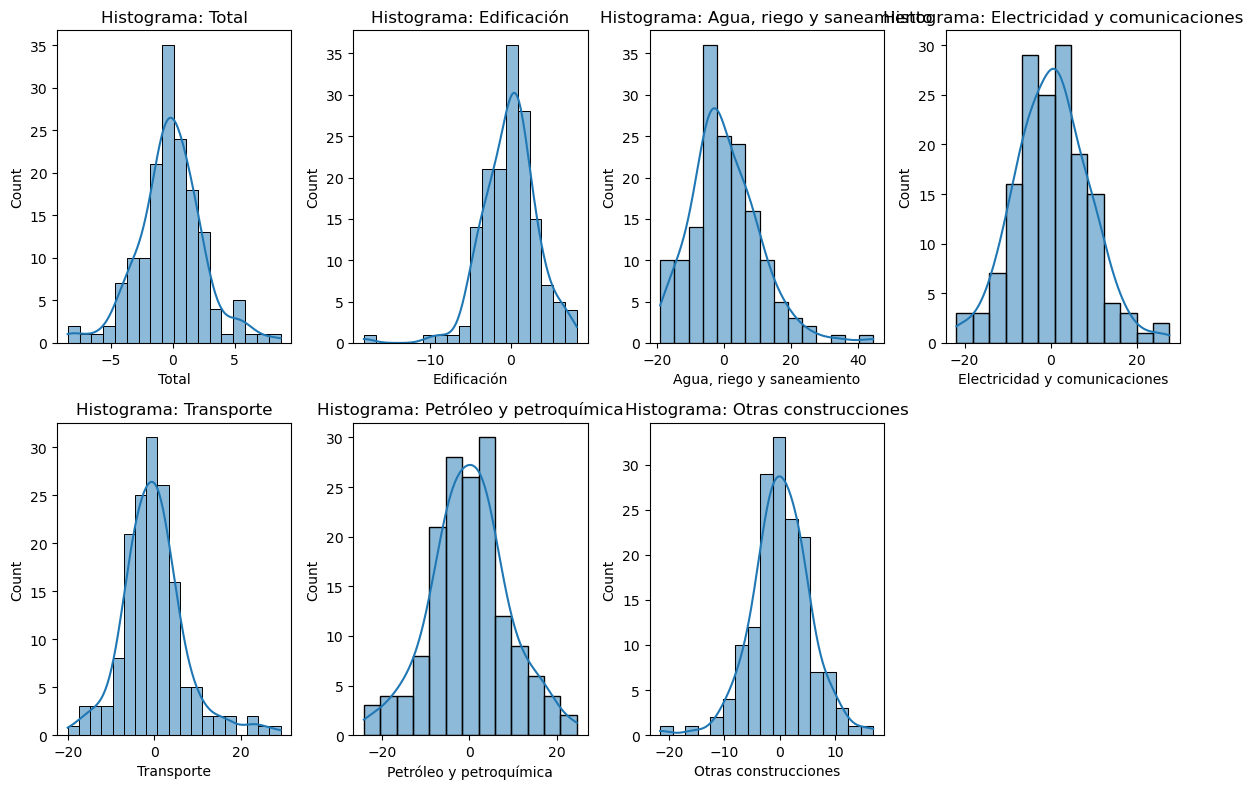

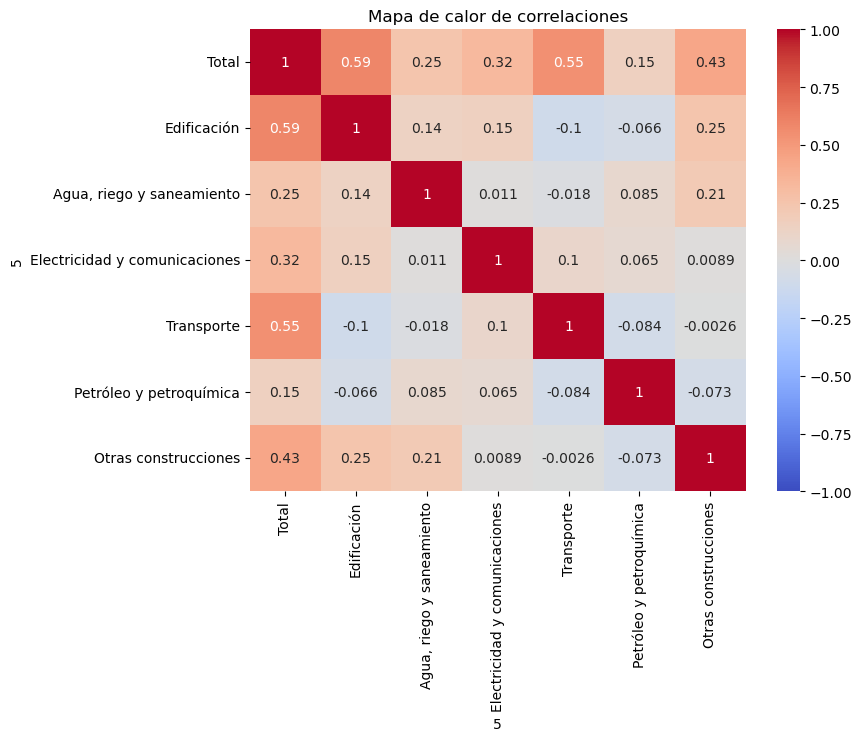

In [14]:
make_plots_cuantitativas(df_procesado)